# EDA

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import missingno as msno

%matplotlib inline
%precision %.2f

pd.set_option('display.max_rows', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 100)

In [2]:
combined = pd.read_csv('../data/interim/combined.csv',index_col='index')
combined = combined.drop('Unnamed: 0',axis =1)

In [3]:
combined.shape

(307499, 272)

In [4]:
combined.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,in_cnt_payment_mean,in_sum_payment_delay_sum,in_sum_payment_delay_mean,in_sum_payment_delay_max,in_sum_payment_delay_last,in_sum_payment_advance_sum,in_sum_payment_advance_mean,in_sum_payment_advance_max,in_sum_payment_advance_last,nflag_insured_on_approval_sum,nflag_last_appl_per_contract_sum,nflag_last_appl_in_day_sum,pc_latest_contract_status_last,cr_latest_contract_status_last,name_client_type_last,name_yield_group_grp_mode,name_yield_group_last,name_payment_type_grp_mode,name_payment_type_last,product_combination_grp_mode,product_combination_last,name_type_suite_grp_mode,name_type_suite_last,channel_type_grp_mode,channel_type_last,code_reject_reason_grp_mode,code_reject_reason_last,prev_cnt_ct_cash_loans,prev_cnt_ct_consumer_loans,prev_cnt_ct_revolving_loans,prev_cnt_cs_approved,prev_cnt_cs_canceled,prev_cnt_cs_refused,prev_cnt_cs_unused_offer,prev_cnt_pt_xna,prev_cnt_pt_walk-in,prev_cnt_pt_x-sell,bc_cnt_loans,bc_cnt_credit_type,bc_sum_cnt_credit_prolong,bc_last_days,amt_max_credit_overdue,bc_cnt_car_loan,bc_cnt_consumer_credit,bc_cnt_cr_type_others,bc_cnt_credit_card,bc_cnt_mortgage,bc_cnt_active,bc_cnt_closed,bc_cnt_cr_status_others
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,19.000000,0.0,0.0,0.0,0.0,388.0,388.000000,388.0,388.0,0.0,1.0,1.0,Active,NaN,New,low_normal,low_normal,XNA,XNA,POS other with interest,POS other with interest,NaN,NaN,Stone,Stone,XAP,XAP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2.0,0.0,-7.0,5043.645,0.0,4.0,0.0,4.0,0.0,2.0,6.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,8.333333,0.0,0.0,0.0,0.0,179.0,59.666667,81.0,31.0,2.0,3.0,3.0,Completed,NaN,Repeater,middle,low_normal,Cash through the bank,XNA,Cash X-Sell: low,Cash X-Sell: low,Family,Unaccompanied,Stone,Credit and cash offices,XAP,XAP,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,2.0,0.0,-43.0,0.000,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,0.0,0.0,0.0,0.0,23.0,23.000000,23.0,23.0,0.0,1.0,1.0,Completed,NaN,New,middle,middle,Cash through the bank,Cash through the bank,POS mobile without interest,POS mobile without interest,Unaccompanied,Unaccompanied,Regional / Local,Regional / Local,XAP,XAP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0

In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Columns: 272 entries, sk_id_curr to bc_cnt_cr_status_others
dtypes: float64(200), int64(41), object(31)
memory usage: 640.5+ MB


combined dataframe is consuming a lot of system memory. Let us __optimize memory__ usage by changing data types without losing any information.

In [6]:
col_names = combined.columns
data_type = combined.dtypes
data_type.value_counts()

float64    200
int64       41
object      31
dtype: int64

We have 200 float64 features. We will limit these features to float16 wherever possible.

In [7]:
float_features = data_type[data_type == 'float64'].index
combined[float_features].head()

,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_registration,own_car_age,cnt_fam_members,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,...,rt_payment_delay_max,rt_payment_delay_last,rt_payment_advance_sum,rt_payment_advance_mean,rt_payment_advance_max,rt_payment_advance_last,rate_down_payment_sum,rate_down_payment_mean,rate_down_payment_max,rate_down_payment_last,cnt_payment_sum,cnt_payment_mean,cr_sum_cnt_drawings_curr_sum,cr_sum_cnt_drawings_curr_mean,in_cnt_payment_sum,in_cnt_payment_mean,in_sum_payment_delay_sum,in_sum_payment_delay_mean,in_sum_payment_delay_max,in_sum_payment_delay_last,in_sum_payment_advance_sum,in_sum_payment_advance_mean,in_sum_payment_advance_max,in_sum_payment_advance_last,nflag_insured_on_approval_sum,nflag_last_appl_per_contract_sum,nflag_last_appl_in_day_sum,prev_cnt_ct_cash_loans,prev_cnt_ct_consumer_loans,prev_cnt_ct_revolving_loans,prev_cnt_cs_approved,prev_cnt_cs_canceled,prev_cnt_cs_refused,prev_cnt_cs_unused_offer,prev_cnt_pt_xna,prev_cnt_pt_walk-in,prev_cnt_pt_x-sell,bc_cnt_loans,bc_cnt_credit_type,bc_sum_cnt_credit_prolong,bc_last_days,amt_max_credit_overdue,bc_cnt_car_loan,bc_cnt_consumer_credit,bc_cnt_cr_type_others,bc_cnt_credit_card,bc_cnt_mortgage,bc_cnt_active,bc_cnt_closed,bc_cnt_cr_status_others
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,...,0.000000,0.0,0.562319,0.562319,0.562319,0.562319,0.000000,0.000000,0.000000,0.000000,24.0,24.000000,0.0,NaN,19.0,19.000000,0.0,0.0,0.0,0.0,388.0,388.000000,388.0,388.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2.0,0.0,-7.0,5043.645,0.0,4.0,0.0,4.0,0.0,2.0,6.0,0.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,...,0.000000,0.0,0.786061,0.262020,0.446667,0.093939,0.100061,0.050030,0.100061,0.000000,30.0,10.000000,0.0,NaN,25.0,8.333333,0.0,0.0,0.0,0.0,179.0,59.666667,81.0,31.0,2.0,3.0,3.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,2.0,0.0,-43.0,0.000,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.255556,0.255556,0.255556,0.255556,0.212008,0.212008,0.212008,0.212008,4.0,4.000000,0.0,NaN,3.0,3.000000,0.0,0.0,0.0,0.0,23.0,23.000000,23.0,23.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,-382.0,0.000,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Range for float16 datatype

In [8]:
f16_min = np.finfo(np.float16).min
f16_max = np.finfo(np.float16).max
f16_min,f16_max

(-65500.0, 65500.0)

Getting minimum and maximum values of each features.

In [9]:
df_float = pd.DataFrame()
df_float['ft_min'] = combined[float_features].min()
df_float['ft_max'] = combined[float_features].max()
df_float.head()

,ft_min,ft_max
amt_income_total,25650.00000,1.170000e+08
amt_credit,45000.00000,4.050000e+06
amt_annuity,1615.50000,2.580255e+05
amt_goods_price,40500.00000,4.050000e+06
region_population_relative,0.00029,7.250800e-02


Identifying features which are within float16 range to be converted to float16

In [10]:
small_float_col = df_float[((df_float.ft_min > f16_min) & (df_float.ft_max <  f16_max))].index
combined[small_float_col] = combined[small_float_col].astype(np.float16)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Columns: 272 entries, sk_id_curr to bc_cnt_cr_status_others
dtypes: float16(144), float64(56), int64(41), object(31)
memory usage: 387.1+ MB


With float64 to float16 conversion, we have successfully __reduced the memory size by 40%.__

Let us convert object datatype to category.

In [11]:
cat_features = data_type[data_type == 'object'].index
combined[cat_features].head()

,name_contract_type,code_gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,weekday_appr_process_start,organization_type,fondkapremont_mode,housetype_mode,wallsmaterial_mode,emergencystate_mode,pc_latest_contract_status_last,cr_latest_contract_status_last,name_client_type_last,name_yield_group_grp_mode,name_yield_group_last,name_payment_type_grp_mode,name_payment_type_last,product_combination_grp_mode,product_combination_last,name_type_suite_grp_mode,name_type_suite_last,channel_type_grp_mode,channel_type_last,code_reject_reason_grp_mode,code_reject_reason_last
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Active,NaN,New,low_normal,low_normal,XNA,XNA,POS other with interest,POS other with interest,NaN,NaN,Stone,Stone,XAP,XAP
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Completed,NaN,Repeater,middle,low_normal,Cash through the bank,XNA,Cash X-Sell: low,Cash X-Sell: low,Family,Unaccompanied,Stone,Credit and cash offices,XAP,XAP
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,Completed,NaN,New,middle,middle,Cash through the bank,Cash through the bank,POS mobile without interest,POS mobile without interest,Unaccompanied,Unaccompanied,Regional / Local,Regional / Local,XAP,XAP
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN,Completed,Active,Repeater,XNA,low_normal,XNA,Cash through the bank,Cash,Cash X-Sell: low,NaN,Unaccompanied,Credit and cash offices,Credit and cash offices,XAP,LIMIT
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN,Active,NaN,Repeater,high,middle,Cash through the bank,Cash through the bank,Cash X-Sell: middle,Cash X-Sell: middle,NaN,Unaccompanied,Country-wide,Credit and cash offices,XAP,XAP


In [12]:
combined[cat_features].nunique().sort_values(ascending = False)

organization_type               58
occupation_type                 18
product_combination_last        17
product_combination_grp_mode    17
code_reject_reason_last          9
                                ..
name_contract_type               2
code_gender                      2
flag_own_realty                  2
flag_own_car                     2
emergencystate_mode              2
Length: 31, dtype: int64

Except for organization_type, we do not have high number of catagories in any features.  
Hence, we can benefit from converting these features to category type.

In [13]:
combined[cat_features] = combined[cat_features].astype('category')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Columns: 272 entries, sk_id_curr to bc_cnt_cr_status_others
dtypes: category(31), float16(144), float64(56), int64(41)
memory usage: 323.5 MB


Similarly, we can convert int64 datatype to int8.

In [14]:
int_features = data_type[data_type == 'int64'].index
combined[int_features].head()

,sk_id_curr,target,cnt_children,days_birth,days_employed,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,100002,1,0,-9461,-637,-2120,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


A quick look at data suggests that sk_id_curr,days_birth,days_employed and days_id_publish features can have positive values but less than 255. Performing a check below on rest of the features.

In [15]:
big_int_col = ['sk_id_curr','days_birth','days_employed','days_id_publish']
small_int_col = list(set(int_features) - set(big_int_col))
# Getting minimum & maximum values of from all features.
combined[small_int_col].min().min(),combined[small_int_col].max().max()

(0, 23)

In [16]:
combined[small_int_col] = combined[small_int_col].astype(np.int8)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Columns: 272 entries, sk_id_curr to bc_cnt_cr_status_others
dtypes: category(31), float16(144), float64(56), int64(4), int8(37)
memory usage: 247.5 MB


Finally, we have reduced the __memory size by more than 60%.__

In [17]:
# Check whether all columns are present.
list(set(combined.columns) - set(col_names))

[]

In [18]:
df_train, df_test = train_test_split(combined, test_size=0.3,
                                     stratify=combined.target, random_state=47)

In [19]:
df_train.shape,df_test.shape

((215249, 272), (92250, 272))

In [20]:
df_train.target.mean(),df_test.target.mean()

(0.08072975948784895, 0.08073712737127371)

In [21]:
prop_col =  ['commonarea_medi', 'commonarea_avg', 'commonarea_mode',
            'nonlivingapartments_mode', 'nonlivingapartments_avg',
            'nonlivingapartments_medi', 'fondkapremont_mode',
            'livingapartments_mode', 'livingapartments_avg',
            'livingapartments_medi', 'floorsmin_avg', 'floorsmin_mode',
            'floorsmin_medi', 'years_build_medi', 'years_build_mode',
            'years_build_avg', 'own_car_age', 'landarea_medi', 'landarea_mode',
            'landarea_avg', 'basementarea_medi', 'basementarea_avg',
            'basementarea_mode', 'ext_source_1', 'nonlivingarea_mode',
            'nonlivingarea_avg', 'nonlivingarea_medi', 'elevators_medi',
            'elevators_avg', 'elevators_mode', 'wallsmaterial_mode',
            'apartments_medi', 'apartments_avg', 'apartments_mode',
            'entrances_medi', 'entrances_avg', 'entrances_mode', 'livingarea_avg',
            'livingarea_mode', 'livingarea_medi', 'housetype_mode',
            'floorsmax_mode', 'floorsmax_medi', 'floorsmax_avg',
            'years_beginexpluatation_mode', 'years_beginexpluatation_medi',
            'years_beginexpluatation_avg', 'totalarea_mode', 'emergencystate_mode']


In [22]:
non_prop_col = set(df_train.columns) - set(prop_col)
missing_col = df_train[non_prop_col].isna().mean().sort_values(ascending=False)
missing_col = missing_col.loc[missing_col > 0.05]
missing_col

cr_rt_sum_payment_inst_mean    0.829398
cr_rt_sum_payment_inst_last    0.829398
cr_avg_payment_mean            0.829398
cr_rt_max_payment_inst_max     0.829398
cr_rt_max_balance_cr_max       0.749657
                                 ...   
name_yield_group_last          0.053640
cr_sum_sk_dpd_sum              0.053640
cr_avg_payment_sum             0.053640
pc_sum_sk_dpd_def_sum          0.053640
prev_cnt_cs_approved           0.053640
Length: 158, dtype: float64

In [23]:
missing_col_lst = list(missing_col.index)
miss_corr = df_train[missing_col_lst].isna().corr()

In [24]:
miss_corr

,cr_rt_sum_payment_inst_mean,cr_rt_sum_payment_inst_last,cr_avg_payment_mean,cr_rt_max_payment_inst_max,cr_rt_max_balance_cr_max,cr_max_amt_cr_limit_last,cr_max_amt_cr_limit_max,cr_sum_cnt_drawings_curr_mean,cr_avg_dpd_def_max,cr_max_amt_balance_max,cr_sum_amt_payment_tot_last,cr_max_sk_dpd_max,cr_avg_dpd_mean,cr_latest_contract_status_last,cr_max_sk_dpd_def_max,cr_max_sk_dpd_def_last,cr_max_sk_dpd_last,cr_avg_dpd_max,cr_max_amt_payment_tot_max,cr_max_amt_receivable_tot_max,cr_avg_dpd_def_mean,name_type_suite_grp_mode,amt_max_credit_overdue,occupation_type,name_type_suite_last,ext_source_3,bc_last_days,bc_cnt_cr_type_others,bc_cnt_active,bc_cnt_closed,bc_cnt_car_loan,bc_cnt_credit_card,bc_cnt_mortgage,bc_cnt_consumer_credit,bc_sum_cnt_credit_prolong,bc_cnt_credit_type,bc_cnt_cr_status_others,bc_cnt_loans,amt_req_credit_bureau_day,amt_req_credit_bureau_qrt,amt_req_credit_bureau_mon,amt_req_credit_bureau_year,amt_req_credit_bureau_week,amt_req_credit_bureau_hour,amt_down_payment_mean,amt_down_payment_max,rate_down_payment_mean,amt_down_payment_last,rate_down_payment_max,rate_down_payment_last,...,in_rt_cnt_deficit_pmt_sum,in_rt_amt_deficit_inst_sum,prev_cnt_pt_xna,days_decision_mean,name_payment_type_last,prev_cnt_cs_canceled,amt_credit_sum,prev_cnt_ct_cash_loans,prev_cnt_cs_refused,channel_type_last,prev_cnt_ct_consumer_loans,rt_annuity_credit_sum,cr_sum_cnt_drawings_curr_sum,product_combination_last,amt_down_payment_sum,amt_application_max,amt_annuity_sum,amt_application_mean,name_payment_type_grp_mode,in_rt_amt_surplus_inst_sum,in_rt_cnt_surplus_pmt_sum,cr_sum_sk_dpd_def_sum,prev_cnt_cs_unused_offer,in_sum_payment_delay_sum,code_reject_reason_last,pc_sum_sk_dpd_sum,loan_durtn_1st_ver_sum,amt_application_sum,in_sum_payment_advance_sum,name_yield_group_grp_mode,amt_credit_max,in_rt_sum_payment_inst_sum,amt_application_last,code_reject_reason_grp_mode,prev_cnt_pt_x-sell,amt_credit_last,rt_credit_application_sum,amt_credit_mean,rt_payment_advance_sum,rate_down_payment_sum,cnt_payment_sum,nflag_last_appl_per_contract_sum,in_cnt_payment_sum,nflag_last_appl_in_day_sum,name_client_type_last,name_yield_group_last,cr_sum_sk_dpd_sum,cr_avg_payment_sum,pc_sum_sk_dpd_def_sum,prev_cnt_cs_approved
cr_rt_sum_payment_inst_mean,1.000000,1.000000,1.000000,1.000000,0.774366,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,-0.107144,0.009877,0.037625,0.136999,0.017225,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.010361,0.010361,0.010361,0.010361,0.010361,0.010361,0.012519,0.012519,0.012519,0.012519,0.012519,0.012519,...,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976
cr_rt_sum_payment_inst_last,1.000000,1.000000,1.000000,1.000000,0.774366,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,0.779801,-0.107144,0.009877,0.037625,0.136999,0.017225,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.011798,0.010361,0.010361,0.010361,0.010361,0.010361,0.010361,0.012519,0.012519,0.012519,0.012519,0.012519,0.012519,...,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0.107976,0

In [25]:
(miss_corr.stack()[(abs(miss_corr.stack()) > 0.7)])

cr_rt_sum_payment_inst_mean  cr_rt_sum_payment_inst_mean    1.000000
                             cr_rt_sum_payment_inst_last    1.000000
                             cr_avg_payment_mean            1.000000
                             cr_rt_max_payment_inst_max     1.000000
                             cr_rt_max_balance_cr_max       0.774366
                                                              ...   
prev_cnt_cs_approved         name_yield_group_last          1.000000
                             cr_sum_sk_dpd_sum              1.000000
                             cr_avg_payment_sum             1.000000
                             pc_sum_sk_dpd_def_sum          1.000000
                             prev_cnt_cs_approved           1.000000
Length: 12614, dtype: float64

In [26]:
(miss_corr.stack()[miss_corr.stack() > 0.7]).index

MultiIndex([('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ('cr_rt_sum_payment_inst_mean', ...),
            ...
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_approved', ...),
            (       'prev_cnt_cs_a

In [27]:
#sns.heatmap(miss_corr.loc[( abs(miss_corr) > 0.7),])

In [28]:
num_features = ( set(float_features) | set(int_features) 
                - set(['sk_id_curr','target']) - set(prop_col) )

In [29]:
# from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [30]:
get_top_abs_correlations(df_train[num_features],20)

cr_avg_dpd_mean                   cr_avg_dpd_max                   0.999994
cr_rt_sum_payment_inst_last       cr_rt_sum_payment_inst_sum       0.999994
cr_avg_dpd_def_mean               cr_avg_dpd_def_max               0.999977
amt_goods_price_max               amt_application_max              0.999966
amt_goods_price_sum               amt_application_sum              0.999935
cr_max_amt_receivable_tot_max     cr_max_amt_balance_max           0.999921
cr_rt_sum_payment_inst_last       cr_rt_sum_payment_inst_mean      0.999904
cr_rt_sum_payment_inst_sum        cr_rt_sum_payment_inst_mean      0.999894
days_employed                     flag_emp_phone                   0.999793
cr_max_sk_dpd_max                 cr_max_sk_dpd_last               0.999699
nflag_last_appl_per_contract_sum  nflag_last_appl_in_day_sum       0.999405
cr_sum_cnt_drawings_curr_sum      cr_sum_cnt_drawings_curr_mean    0.999249
cr_max_sk_dpd_def_max             cr_max_sk_dpd_def_last           0.998978
years_build_

In [31]:
# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

In [135]:
def plot_default_rate(df, var, var_desc):
    with plt.style.context('seaborn-white'):
        df_grouped = df.groupby(var).agg({'target':['mean']}).pipe(flatten_cols)
        fig, ax = plt.subplots()
        sns.lineplot(data=df_grouped, x = df_grouped.index, y ='target_mean', label = 'Default Rate',color="red", ax=ax)
        ax.set_title('Default Rate by '+var_desc, fontsize = 15)
        ax.set_ylabel('Default Rate',rotation = 0,loc="top",va='bottom')
        ax.set_xlabel(var_desc)
        # Increase the size of graph when we have more than 4 categories
        if df_grouped.shape[0] > 4:
            fig.set_size_inches(9,6)
            plt.xticks(rotation=45, ha='right')
        ax.set_ylim(ymin=0,ymax=df_grouped.target_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax2 = plt.twinx()
        sns.countplot(data=df,x= var,color="sandybrown",alpha=0.4,label = 'Counts',ax=ax2)
        ax2.set_ylabel('Counts',rotation=0,loc="top",va='bottom',)
        ax2.grid(False)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.show();


In [398]:
def plot_default_rate_cat(df, var, var_desc):
    with plt.style.context('bmh'):
        df_grouped = df.groupby(var).agg({'target':['mean'],'sk_id_curr':['count']}).pipe(flatten_cols)
        fig, ax = plt.subplots()
        ax.plot(df_grouped.index, df_grouped.target_mean, color='red')
        ax.set_title('Default Rate by '+var_desc)
        ax.set_ylabel('Default Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        # Increase the size of graph when we have more than 4 categories
        if df_grouped.shape[0] > 4:
            fig.set_size_inches(9,6)
            plt.xticks(rotation=45, ha='right')
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        ax.set_ylim(ymin=0,ymax=df_grouped.target_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index,df_grouped.sk_id_curr_count,
                    alpha=0.4, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        fig.legend(labels=('Default Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.show();


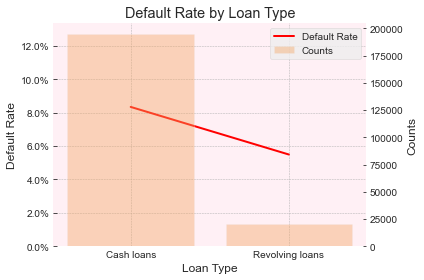

In [399]:
plot_default_rate_cat(df_train,'name_contract_type','Loan Type')

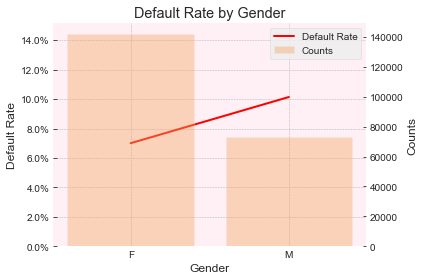

In [400]:
plot_default_rate_cat(df_train,'code_gender','Gender')

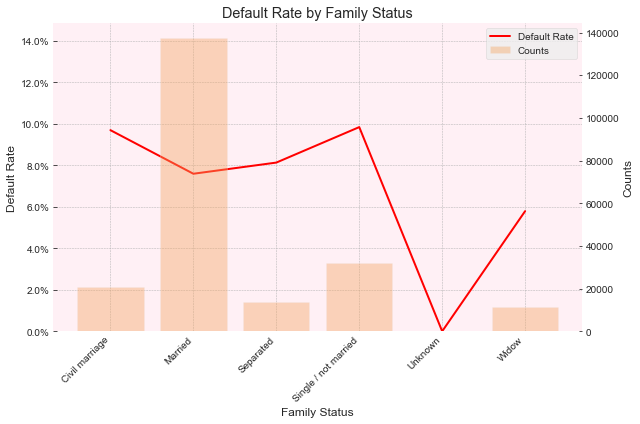

In [401]:
plot_default_rate_cat(df_train,'name_family_status','Family Status')

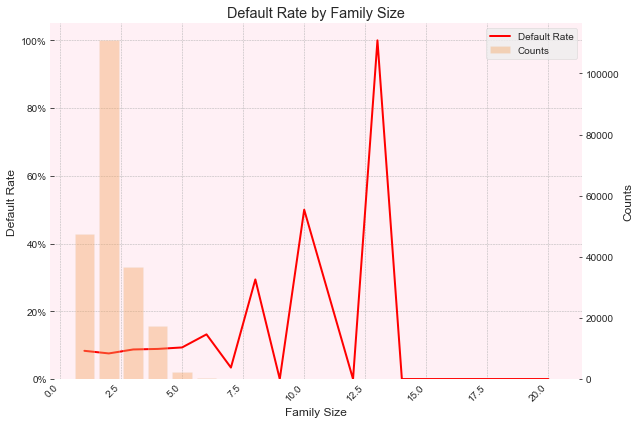

In [402]:
plot_default_rate_cat(df_train,'cnt_fam_members','Family Size')

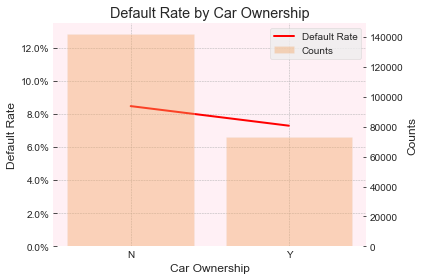

In [403]:
plot_default_rate_cat(df_train,'flag_own_car','Car Ownership')

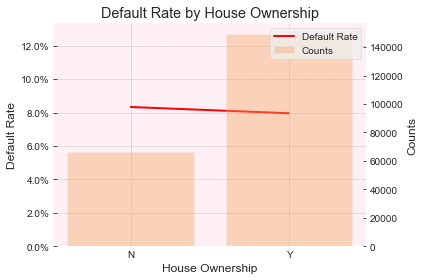

In [404]:
plot_default_rate_cat(df_train,'flag_own_realty','House Ownership')

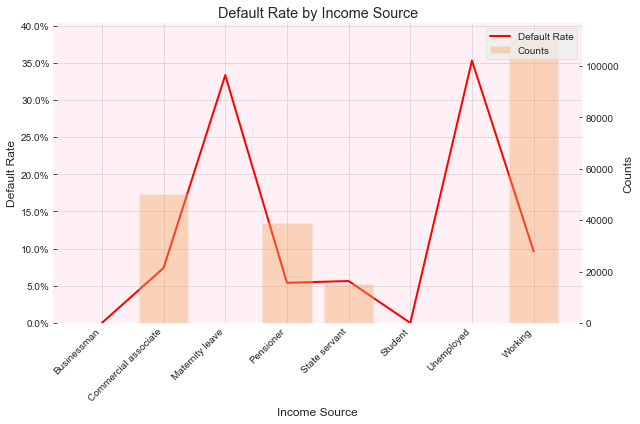

In [405]:
plot_default_rate_cat(df_train,'name_income_type','Income Source')

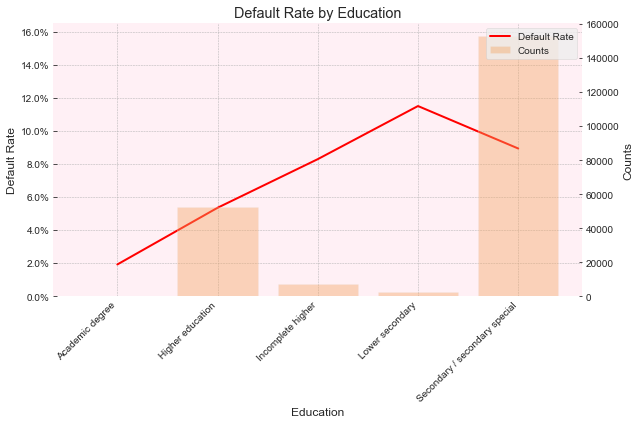

In [406]:
plot_default_rate_cat(df_train,'name_education_type','Education')

In [407]:
df_train.cnt_fam_members.dtypes

dtype('float16')

In [408]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [245]:
df_grouped = df_train.groupby('code_gender').agg({'target':['mean'],'sk_id_curr':['count']}).pipe(flatten_cols)
df_grouped

,target_mean,sk_id_curr_count
code_gender,,
F,0.070041,141889
M,0.101404,73360


In [ ]:
def plot_default_rate(df, var, var_desc):
    with plt.style.context('bmh'):
        df_grouped = df.groupby(var).agg({'target':['mean'],'sk_id_curr':['count']}).pipe(flatten_cols)
        fig, ax = plt.subplots()
        sns.lineplot(data=df_grouped, x=df_grouped.index, y='target_mean', color='red',label = 'Default Rate',ax=ax)
        ax.set_title('Default Rate by '+var_desc)
        ax.set_ylabel('Default Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush')
        #ax.grid(False)
        if df_grouped.shape[0] > 4:
            fig.set_size_inches(9,6)
            plt.xticks(rotation=45, ha='right')
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        ax.set_ylim(ymin=0,ymax=df_grouped.target_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax2 = plt.twinx()
        sns.barplot(data=df_grouped,x= df_grouped.index, y='sk_id_curr_count',
                    label = 'Counts', alpha=0.4, color="sandybrown",ax=ax2)
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        fig.legend(loc=2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.show();
